In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as s

In [3]:
d = pd.read_csv("cristiano_vs_messi.csv")
df = pd.DataFrame(d)
# print(df.to_string())

#Exploratory Data analysis
df = df.drop_duplicates()
# df = df.dropna()
# print(df.isna().sum())
# print(df.describe().to_string())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1268 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   player    1268 non-null   object
 1   comp      846 non-null    object
 2   round     846 non-null    object
 3   date      846 non-null    object
 4   venue     846 non-null    object
 5   opp       846 non-null    object
 6   pos       793 non-null    object
 7   min       1268 non-null   object
 8   type      1249 non-null   object
 9   assisted  865 non-null    object
dtypes: object(10)
memory usage: 109.0+ KB
None


In [4]:
# Display first 30 rows
df4 = pd.DataFrame(d)
df4.head(30)

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13',NaN,NaN
5,ronaldo,Premier League,11,11/1/2003,H,Portsmouth,RW,80',Right-footed shot,NaN
6,ronaldo,FA Cup,Fifth Round,2/14/2004,H,Man City,RW,74',Tap-in,Ryan Giggs
7,ronaldo,Premier League,29,3/20/2004,H,Spurs,NaN,89',Right-footed shot,NaN
8,ronaldo,Premier League,32,4/10/2004,A,Birmingham,NaN,60',Header,Ryan Giggs
9,ronaldo,Premier League,38,5/15/2004,A,Aston Villa,NaN,4',Right-footed shot,NaN


In [5]:
ron = df4.loc[df4['player']=="ronaldo"]
mess = df4.loc[df4['player']=="messi"]
ron['min'] = ron['min'].str.replace("'","")
mess['min'] = mess['min'].str.replace("'","")
ron['min'] = ron['min'].str.replace("+","")
mess['min'] = ron['min'].str.replace("+","")
ron['min'] = pd.to_numeric(ron['min'])
mess['min'] = pd.to_numeric(ron['min'])
ron['half'] = ron['min']<=45
mess['half'] = mess['min']<=45
a = ron['half'].value_counts()
b = mess['half'].value_counts()
d = {"Ronaldo":[a],"Messi":[b]}
print(d)

{'Ronaldo': [half
False    372
True     284
Name: count, dtype: int64], 'Messi': [half
False    644
Name: count, dtype: int64]}


C:\Users\nihar\AppData\Local\Temp\ipykernel_23068\867633131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ron['min'] = ron['min'].str.replace("'","")
C:\Users\nihar\AppData\Local\Temp\ipykernel_23068\867633131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mess['min'] = mess['min'].str.replace("'","")
C:\Users\nihar\AppData\Local\Temp\ipykernel_23068\867633131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [6]:
# Fill nan values
df['player'] = df['player'].ffill()
df['comp'] = df['comp'].ffill()
df['round'] = df['round'].ffill()
df['date'] = df['date'].ffill()
df['venue'] = df['venue'].ffill()
df['opp'] = df['opp'].ffill()
df['pos'] = df['pos'].ffill()
df['min'] = df['min'].ffill()
df['type'] = df['type'].ffill()
# df['assisted'] = df['assisted'].ffill()
df

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,RW,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,RW,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,RW,13',Left-footed shot,NaN
...,...,...,...,...,...,...,...,...,...,...
1295,messi,LaLiga,9,11/7/2020,H,Real Betis,SS,82',Left-footed shot,Sergi Roberto
1296,messi,LaLiga,11,11/29/2020,H,CA Osasuna,RW,73',Left-footed shot,Trincão
1297,messi,LaLiga,13,12/13/2020,H,Levante,CF,76',Left-footed shot,Frenkie de Jong
1298,messi,LaLiga,14,12/19/2020,H,Valencia,CF,45'+4,Header,NaN


player
messi      628
ronaldo    640
Name: player, dtype: int64


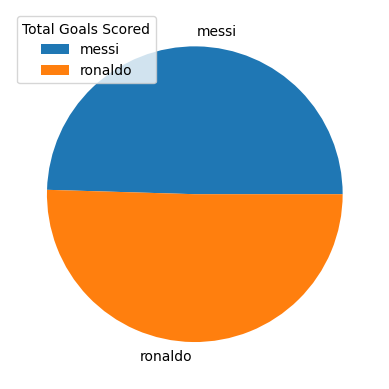

In [7]:
# total goals by both
a = df.groupby('player')['player'].count()
print(a)
plt.pie(a,labels=a.index)
plt.legend(title="Total Goals Scored")

player  messi  ronaldo
venue                 
A         248      275
H         380      365


<Axes: title={'center': 'Home vs Away Goals'}, xlabel='Venue', ylabel='Goals'>

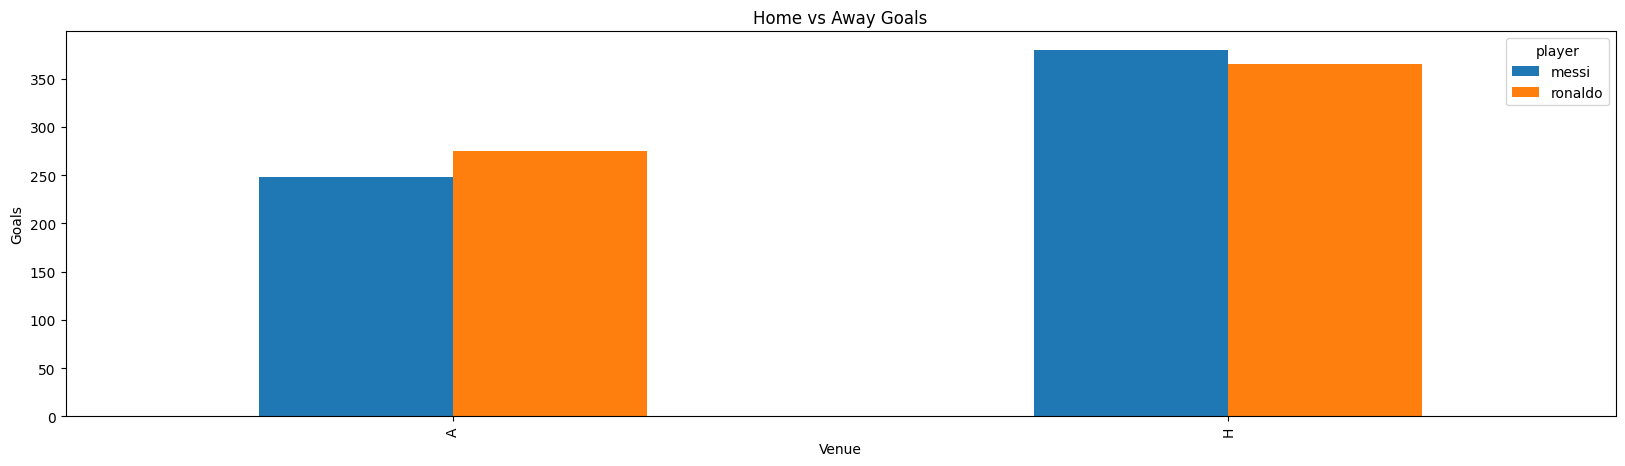

In [8]:
# Home vs Away Goals
b = df.groupby(['venue','player']).size().unstack()
print(b)
b.plot(kind="bar",title="Home vs Away Goals",xlabel="Venue",ylabel="Goals",figsize=(20,5))

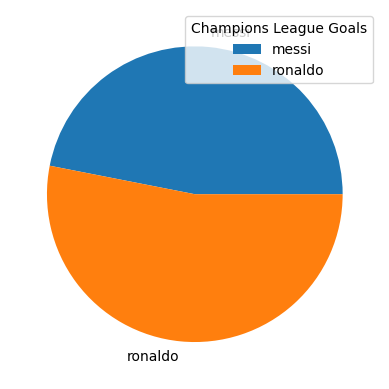

In [9]:
# Goals scored in the champions league
df2 = df.loc[df['comp']=='Champions League']
# print(df2.to_string())
c = df2.groupby('player')['player'].count()
plt.pie(c,labels=c.index)
plt.legend(title="Champions League Goals")


comp     Champions League  Club World Cup  Copa del Rey  LaLiga  Supercopa  UEFA Super Cup
player                                                                                    
messi               114.0             5.0          51.0   441.0       14.0             3.0
ronaldo             129.0             7.0          22.0   302.0        4.0             2.0


<Axes: title={'center': 'Goals Scored in common competitions'}, xlabel='player'>

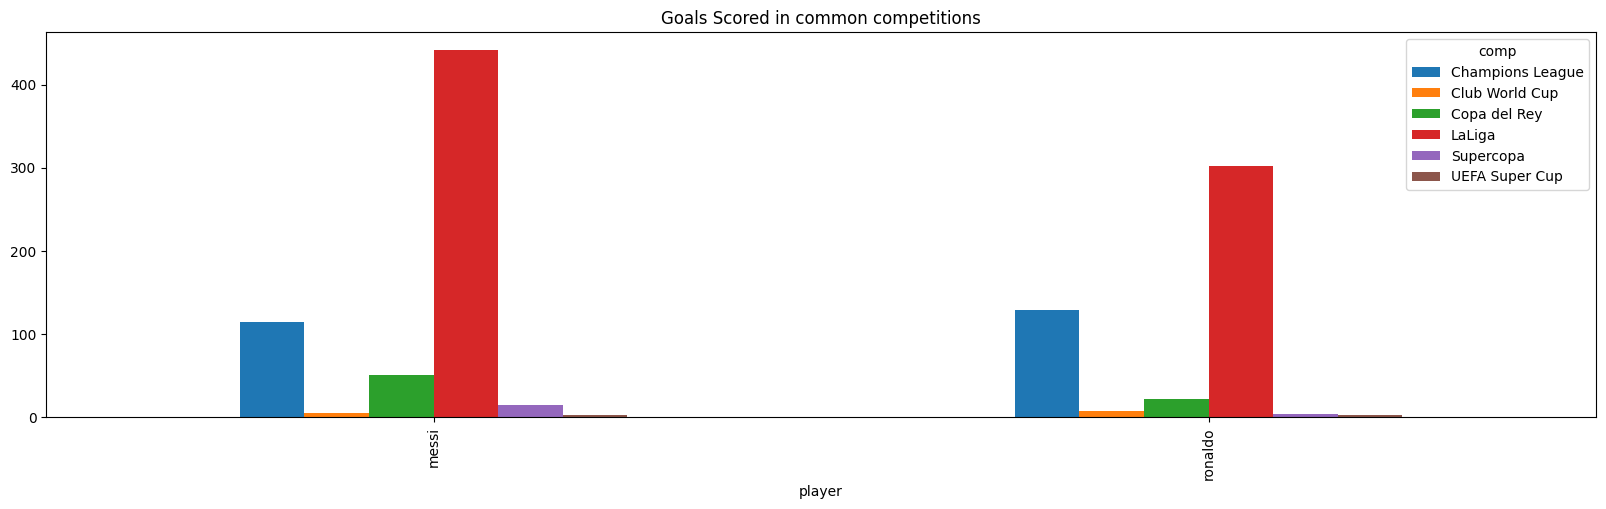

In [10]:
# Goals scored in the Common competiotions
x = df.groupby(['player','comp']).size().unstack()
x = x.dropna(axis=1)
print(x.to_string())
x.plot(kind="bar",figsize=(20,5),title="Goals Scored in common competitions")

In [11]:
# Types of Goals
df5 = pd.DataFrame(d)
a = df5.groupby(['player','type']).size().unstack()
# a=a.dropna(axis=1)
print(a.to_string())
a.plot(kind="bar",title="Types of Goals",figsize=(20,5))


KeyError: 'player'

time     First Half  Injury Time  Second Half
player                                       
messi           276           32          336
ronaldo         284           27          345


<Axes: title={'center': 'Goal Timeline'}, xlabel='player', ylabel='Goals'>

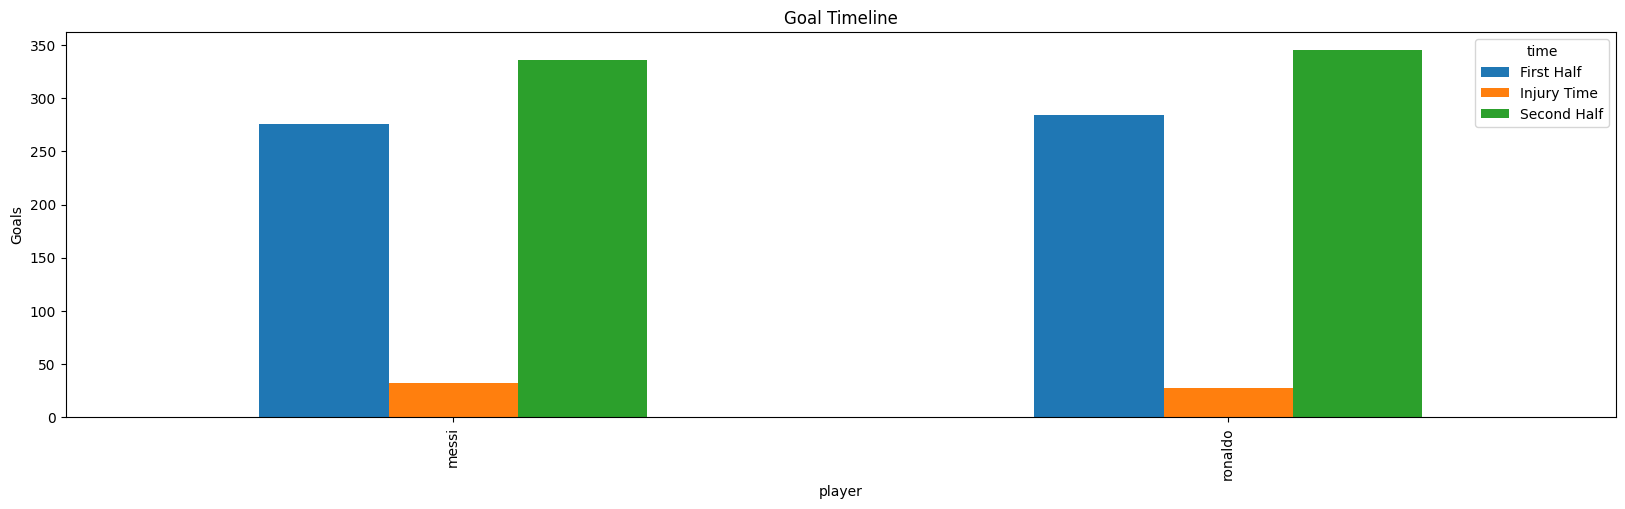

In [ ]:
# Goals scored in first half vs second half vs extra time
df6 = pd.DataFrame(d)
df6['min'] = df6['min'].str.replace("'","")
df6['min'] = df6['min'].str.replace("+","")
df6['min'] = pd.to_numeric(df6['min'])
df6['time'] = df6['min'].apply(lambda x : "First Half" if x<=45 else ("Second Half" if 45<x<=90 else "Injury Time"))
# Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.
a = df6.groupby(['player','time']).size().unstack()
print(a)
a.plot(kind="bar",title="Goal Timeline",figsize=(20,5),ylabel="Goals")

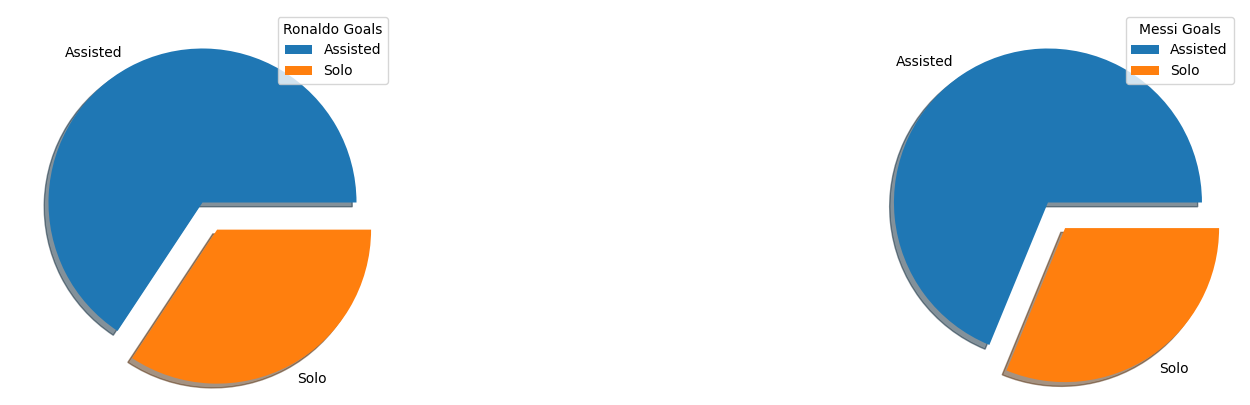

In [ ]:
# Solo Goals vs assisted goals
df6['assisted'] = df6['assisted'].fillna(0)
# print(df6.to_string())
# print(df6.to_string())
df6['goal_type'] = df6['assisted'].apply(lambda x:"Solo" if x==0 else "Assisted")
a = df6.groupby(['player','goal_type']).size().unstack()
ronaldo = a.loc["ronaldo"]
messi = a.loc["messi"] 
f = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(ronaldo,labels=ronaldo.index,explode=[0,0.2],shadow=True)
plt.legend(title="Ronaldo Goals")
plt.subplot(1,2,2)
plt.pie(messi,labels=messi.index,explode=[0,0.2],shadow=True)
plt.legend(title="Messi Goals")



In [ ]:
# Number of goals in one match
df7 = pd.DataFrame(d)
ron_goals = df7.loc[df7['player']=='ronaldo']
a = pd.DataFrame(ron_goals['date'].value_counts().sort_values(ascending=False))
# a
a['goals'] = a['count'].apply(lambda x:"glut" if x==5 else ("Haul" if x==4 else("Hattrick" if x==3 else("Brace" if x==2 else "Single Goal"))))
# print(a)
ronaldo = a['goals'].value_counts().sort_values(ascending=False)
ronaldo

goals
Single Goal    428
Brace            3
Name: count, dtype: int64

<Axes: title={'center': 'Assists for Ronaldo'}, xlabel='assisted', ylabel='Assists'>

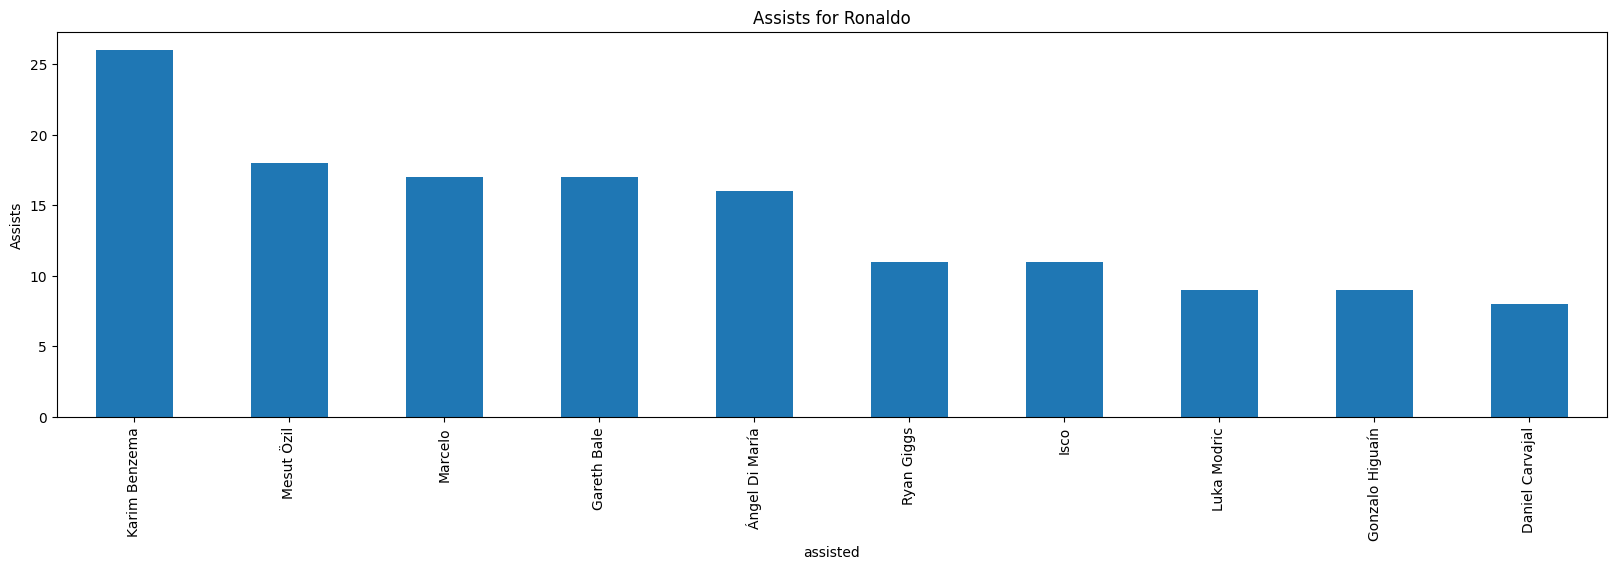

In [ ]:
# Most assists to ronaldo
df8 = pd.DataFrame(d)
df8 = df8.dropna()
ron_assists = df8.loc[df8['player']=='ronaldo']
ronaldo_assists = ron_assists['assisted'].value_counts().sort_values(ascending=False)
ronaldo_assists = ronaldo_assists.head(10)
ronaldo_assists.plot(kind="bar",title="Assists for Ronaldo",figsize=(20,5),ylabel="Assists")

<Axes: title={'center': 'Assists for Messi'}, xlabel='assisted', ylabel='Assists'>

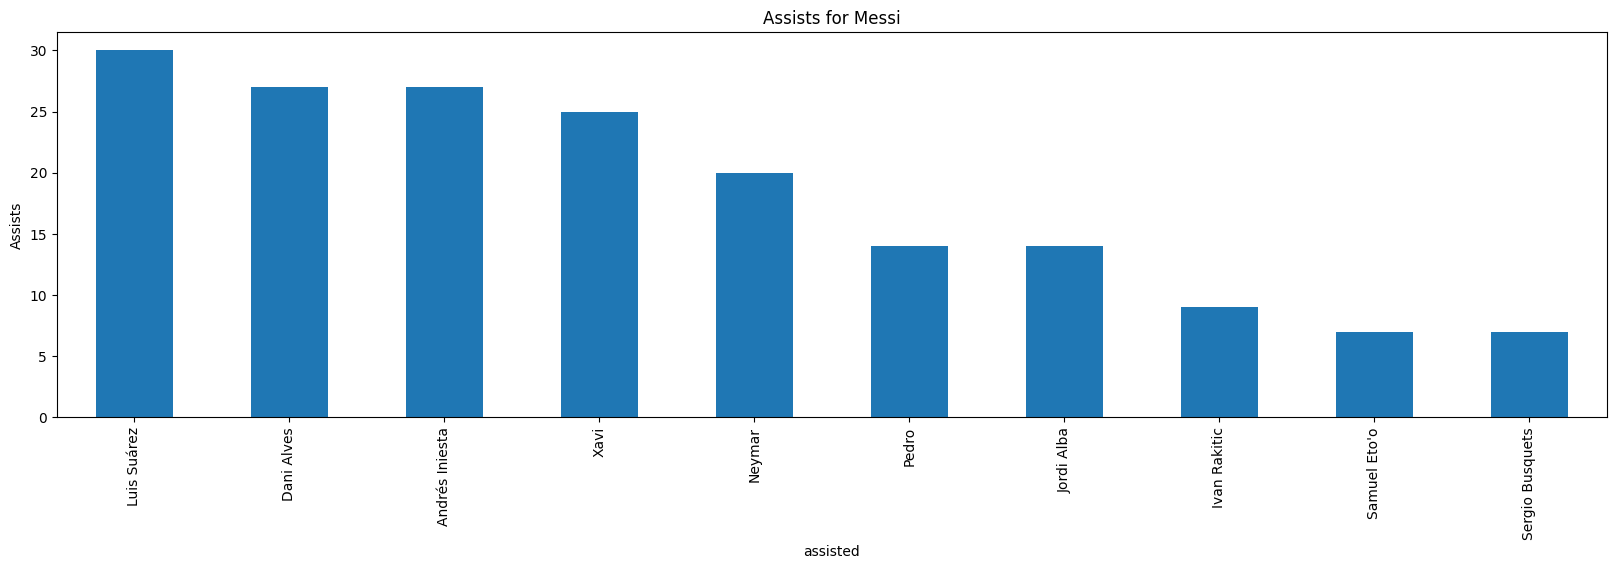

In [ ]:
# Most assists to Messi
mes_assists = df8.loc[df8['player']=='messi']
messi_assists = mes_assists['assisted'].value_counts().sort_values(ascending=False)
messi_assists = messi_assists.head(10)
messi_assists.plot(kind="bar",title="Assists for Messi",figsize=(20,5),ylabel="Assists")

<Axes: title={'center': "Messi's favourite opponent"}, xlabel='opp', ylabel='Goals'>

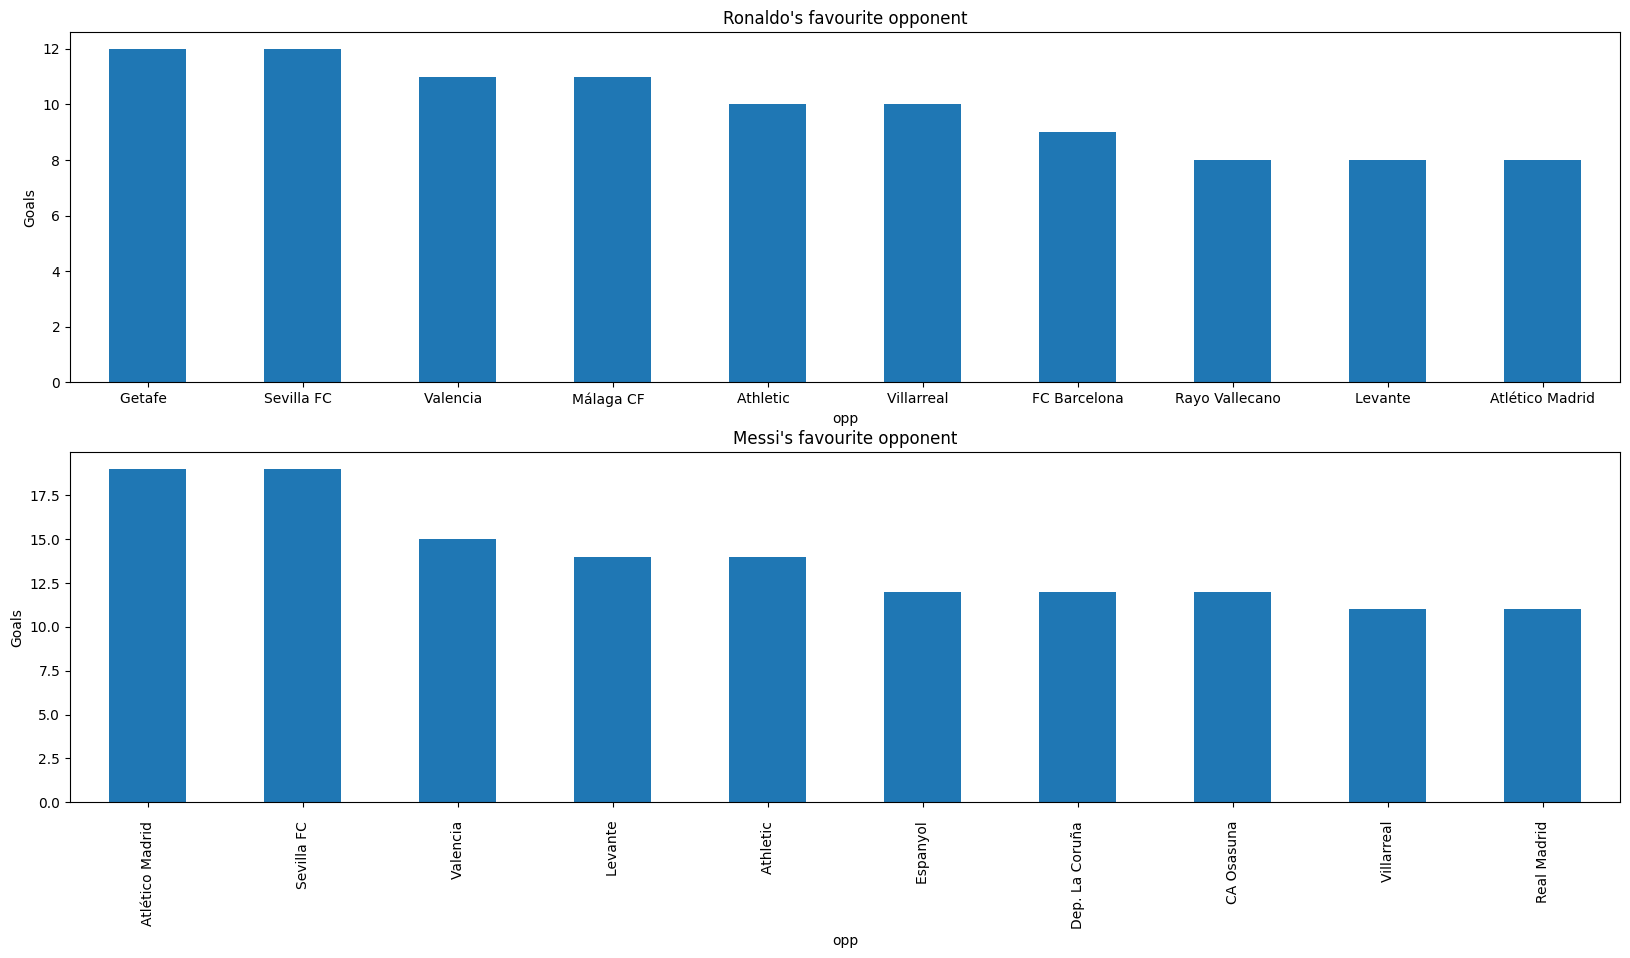

In [ ]:
# Favourite Opponents
f = plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
df9 = pd.DataFrame(d)
ronny = df9.loc[df9['player']=='ronaldo']
ron_opp = ronny['opp'].value_counts().sort_values(ascending=False).head(10)
ron_opp.plot(kind="bar",title="Ronaldo's favourite opponent",ylabel="Goals")
plt.xticks(rotation=0)
plt.subplot(2,1,2)
messy = df9.loc[df9['player']=='messi']
mes_opp = messy['opp'].value_counts().sort_values(ascending=False).head(10)
mes_opp.plot(kind="bar",title="Messi's favourite opponent",ylabel="Goals")


In [12]:

x = pd.read_csv("cristiano_vs_messi.csv")
# x['date'] = pd.DatetimeIndex(x['date'])
x['date'] = pd.to_datetime(x['date'])
x['month'] = x['date'].dt.month
# print(x.to_string())
L=[3,4,5,6]
x['summer'] = x['month'].apply(lambda x: True if x in L else False)
print(x.to_string())
# summ = x.groupby('player')['summer'].sum()
summ = x.groupby(['player','summer']).size().unstack()
print(summ)
# plt.pie(summ,labels=summ.index,explode=[0,0.2])

       player                         comp           round       date venue                opp  pos    min                    type                  assisted  month  summer
0     ronaldo                     Liga NOS               6 2002-10-07     H        Moreirense    RW    34'                     NaN                       NaN   10.0   False
1     ronaldo                     Liga NOS               6 2002-10-07     H        Moreirense   NaN    90'                     NaN                       NaN   10.0   False
2     ronaldo                     Liga NOS               8 2002-10-26     A           Boavista  NaN    88'                     NaN            Carlos Martins   10.0   False
3     ronaldo     Taça de Portugal Placard    Fourth Round 2002-11-24     H          Estarreja  NaN    67'        Left-footed shot              César Prates   11.0   False
4     ronaldo     Taça de Portugal Placard     Fifth Round 2002-12-18     H     Oliv. Hospital  NaN    13'                     NaN          